In [32]:
%load_ext autoreload
%autoreload 2
%reload_ext autoreload
import numpy as np

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [157]:
from gridDelivery import GridDelivery
grid = GridDelivery()
grid.grid

array([[[0, 0, 1, 0, 0],
        [0, 0, 1, 0, 0],
        [1, 1, 1, 1, 1],
        [0, 0, 1, 0, 0],
        [0, 0, 1, 0, 0]],

       [[0, 1, 1, 1, 0],
        [1, 1, 1, 1, 1],
        [1, 1, 1, 1, 1],
        [1, 1, 1, 1, 1],
        [0, 1, 1, 1, 0]],

       [[0, 0, 1, 0, 0],
        [0, 0, 0, 0, 1],
        [0, 0, 0, 0, 0],
        [0, 0, 1, 0, 0],
        [0, 0, 0, 0, 0]]], dtype=int64)

((2, 2), 2, -10, 12124)
{0: (0, 2), 1: (1, 4), 2: (3, 2)}


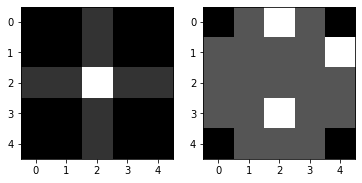

((2, 2), 0, -10, 12124)
{0: (0, 2), 1: (1, 4), 2: (3, 2)}


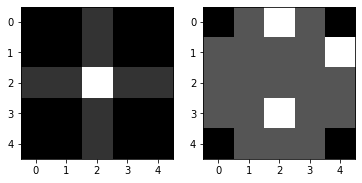

((2, 2), 2, -10, 12124)
{0: (0, 2), 1: (1, 4), 2: (3, 2)}


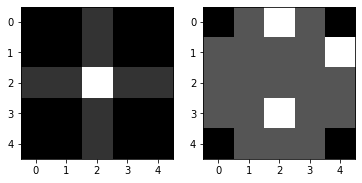

((2, 2), 0, -10, 12124)
{0: (0, 2), 1: (1, 4), 2: (3, 2)}


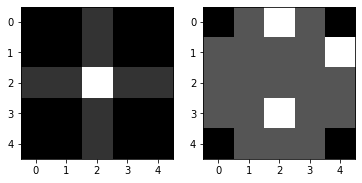

((2, 2), 0, -10, 12124)
{0: (0, 2), 1: (1, 4), 2: (3, 2)}


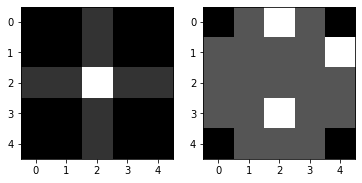

((2, 2), 0, -10, 7124)
{0: (0, 2), 1: (1, 4), 2: (3, 2)}


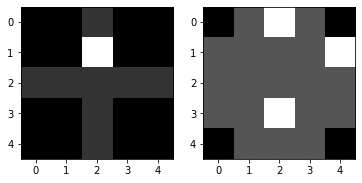

((1, 2), 0, -10, 7124)
{0: (0, 2), 1: (1, 4), 2: (3, 2)}


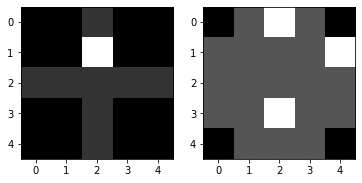

((1, 2), 2, -10, 6124)
{0: (0, 2), 1: (1, 4), 2: (3, 2)}


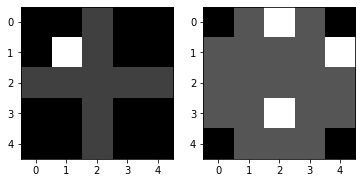

((1, 1), 2, -10, 6124)
{0: (0, 2), 1: (1, 4), 2: (3, 2)}


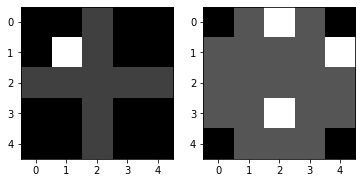

((1, 1), 3, -10, 7124)
{0: (0, 2), 1: (1, 4), 2: (3, 2)}


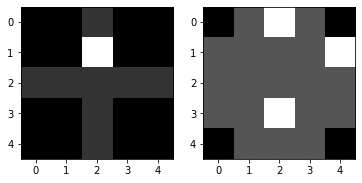

In [158]:
step = 0
while step < 10:
    print(grid.step())
    print(grid.packages)
    grid.plot()
    step += 1

In [160]:
np.prod(grid.state_vector_dims)

25000

In [22]:
list(zip(*np.where(roads == 1)))

[(0, 2), (1, 2), (2, 0), (2, 1), (2, 2), (2, 3), (2, 4), (3, 2), (4, 2)]

In [52]:
np.ravel_multi_index((0,0,0,1),(5,5,5,5))

1

In [60]:
from random import randint
randint(0,3)

2

In [65]:
np.ones((10,10))[1, 

NameError: name 'unzip' is not defined